In [137]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

## $A$ is the features matrix, $Y$ is the response matrix, $C$ is the covariance matrix. 

${\displaystyle \qquad \mathbf{y}={\begin{bmatrix}y_{1}\\y_{2}\\\vdots \\y_{N}\end{bmatrix}}}$

${\displaystyle \qquad \mathbf{A}={\begin{bmatrix}1 & x_{1}\\ 1 & x_{2}\\\vdots \\ 1 & x_{N}\end{bmatrix}}}$

${\displaystyle 
\qquad \mathbf{C}={
\begin{bmatrix}
\sigma_{y_1}^2 & 0 & \ldots & 0 \\ 
0 & \sigma_{y_2}^2 & \ldots & 0 \\
0 & 0 & \ddots & 0 \\ 
0 & 0 & \ldots & \sigma_{y_N}^2 
\end{bmatrix}
}}$

### The $x_i$ and $y_i$ are the data point's x- and y-axis values. There are $N$ data points in the full sample. 
### $\sigma_{x,i}$ is the x-error in the ith data point, thus $\sigma_{x,i} = xerr[i]$
### $\sigma_{y,i}$ is the y-error in the ith data point, thus $\sigma_{y,i} = yerr[i]$
### $\sigma_{x,i}^2$ and $\sigma_{y,i}^2$ are called the variances. (xerr[i]^2) and (yerr[i]^2) for the ith data point. 

\begin{equation}\label{eq:linearmodel}
f(x) = mx + b
\end{equation}

\begin{equation}\label{eq:Yvector}
\qquad 
\mathbf{Y}=
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{N}
\end{bmatrix}
\end{equation}

\begin{equation}\label{eq:Amatrix}
\qquad 
\mathbf{A}=
\begin{bmatrix}
1 & x_{1}\\ 
1 & x_{2}\\
\vdots \\ 
1 & x_{N}
\end{bmatrix}
\end{equation}

\begin{equation}\label{eq:Cmatrix}
\mathbf{C}=
\begin{bmatrix}
\sigma_{y_1}^2 & 0 & \ldots & 0 \\ 
0 & \sigma_{y_2}^2 & \ldots & 0 \\
0 & 0 & \ddots & 0 \\ 
0 & 0 & \ldots & \sigma_{y_N}^2 
\end{bmatrix}
\end{equation}


#### NOTE:  There will be a $\mathbf{C_i}$ for every set of data points, and combined they make $\mathbf{C}$  The full uncertainty covariance matrix for each data point is given by:
\begin{equation}
\mathbf{C_{i}} =
\left(
\begin{matrix}
\sigma_{x,i}^2 & \rho_{xy,i}\sigma_{x,i} \sigma_{y,i} \\
\rho_{xy,i}\sigma_{x,i} \sigma_{y,i}  & \sigma_{y,i}^2
\end{matrix}
\right)
\end{equation}
But for now we will ignore the off-diagonal terms and move forward with only the diagonal terms.


### Estimate of parameters; b-intercept, m-slope. 

\begin{equation}\label{eq:parammatrix}
\begin{bmatrix}
b \\
m
\end{bmatrix} = \mathbf{X} = [\mathbf{A}^T \mathbf{C}^{-1} \mathbf{A}]^{-1} [\mathbf{A}^T \mathbf{C}^{-1} \mathbf{Y}]
\end{equation}

You weight everything with the inverse of the covariance matrix (as you would if you were
doing, say, a weighted average), and then left-multiply everything by $A^T$
to reduce the dimensionality, and then equation $\ref{eq:parammatrix}$ is the solution of that
reduced-dimensionality equation. 

### Ymodel values. The yvalues given the model, where X represents the model parameters. 
\begin{equation}\label{eq:ymodel}
\mathbf{Y} = \mathbf{AX}
\end{equation}

**Here, $Y$ represents $YMODEL$, and we wish to know $(YDATA - YMODEL)$. $YDATA$ is our $Y$ vector from above (equation $\ref{eq:Yvector}$).**

**I'm not fond of this formalism. I'd prefer it if X was used to represent the features matrix (which are the x-data points) and if $\beta$ represented the parameters. $Y=X\beta$ makes more sense to me since $y=\beta_0 + \beta_1x$ is a linear model with $\beta$ parameters.**
```

```

\begin{equation}\label{eq:chisqrd}
\chi^2 = \sum^N_{i=-1} \frac{[y_i - f(x_i)]^2}{\sigma_{y_i}^2} = [Y-AX]^T C^{-1} [Y-AX]
\end{equation}

$\chi^2$ is what is minimized, and equation $\ref{eq:parammatrix}$ yields the values $b$ and $m$ that minimize it. Conceptually, $\chi^2$ is a metric distance in data space. 

Notice that the $\chi^2$ equation is the exponential term (without the $-1/2$) of a standard normal distribution. This is becuase we are assuming our errors are normally distributed. Otherwise, you'd see the left hand side of the above equation set to a different distribution. 

\begin{equation}
\chi^2 = [Y-AX]^T C^{-1} [Y-AX]
 = \left((\text{data} - \text{model})^T \  Cov^{-1} \ (\text{data} - \text{model})\right)
\end{equation}
Thus, $[Y-AX]$ is is the $data-model$. This shouldn't be surprising. 


When the uncertainties are Gaussian and their variances, $\sigma_{y,i}$ are correctly estimated, the matrix $[A^T C^{-1} A]^{-1}$ is the covariance matrix for the parameters in $\mathbf{X}$ (equation $\ref{eq:parammatrix}$). This assumes Gaussian uncertainty--uncertainty not error. In the "covariance matrix" returned, variances are on the diagonal and covariances are the off off diagonal terms. This is commonly called the covariance matrix of the fit. I like to call it the variance-covariance matrix for this reason. 

The matrix $\mathbf{C}$ that we call the covaraince matrix above is the covariance between the data's errors, not the covariance matrix of the model fit to the data. Techinically though, $\mathbf{C}$ as shown in equation $\ref{eq:Cmatrix}$ holds only variances and no covariances. We will add covariances (off-diag terms) later. 

In [138]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [139]:
table1 ="""
ID x y yerr xerr rhoxy
1 201 592 61 9 -0.84
2 244 401 25 4 0.31
3 47 583 38 11 0.64
4 287 402 15 7 -0.27
5 203 495 21 5 -0.33
6 58 173 15 9 0.67
7 210 479 27 4 -0.02
8 202 504 14 4 -0.05
9 198 510 30 11 -0.84
10 158 416 16 7 -0.69
11 165 393 14 5 0.30
12 201 442 25 5 -0.46
13 157 317 52 5 -0.03
14 131 311 16 6 0.50
15 166 400 34 6 0.73
16 160 337 31 5 -0.52
17 186 423 42 9 0.90
18 125 334 26 8 0.40
19 218 533 16 6 -0.78
20 146 344 22 5 -0.56
"""

In [140]:
data = table1.split('\n')[2:-1]

data = [data[i].split(' ') for i in range(len(data))]

colnames = table1.split('\n')[1].split(' ')

data = pd.DataFrame(data, columns=colnames)

data = data.astype(float)

data.ID = data.ID.astype(int)

In [141]:
data

,ID,x,y,yerr,xerr,rhoxy
0,1,201.0,592.0,61.0,9.0,-0.84
1,2,244.0,401.0,25.0,4.0,0.31
2,3,47.0,583.0,38.0,11.0,0.64
3,4,287.0,402.0,15.0,7.0,-0.27
4,5,203.0,495.0,21.0,5.0,-0.33
5,6,58.0,173.0,15.0,9.0,0.67
6,7,210.0,479.0,27.0,4.0,-0.02
7,8,202.0,504.0,14.0,4.0,-0.05
8,9,198.0,510.0,30.0,11.0,-0.84
9,10,158.0,416.0,16.0,7.0,-0.69


In [142]:
data.dtypes

ID         int64
x        float64
y        float64
yerr     float64
xerr     float64
rhoxy    float64
dtype: object

### Exercise 1: 

Using the standard linear algebra method of this Section, fit
the straight line $y = mx + b$ to the $x,y$, and $\sigma_y$ values for data points 5
through 20 in Table 1 on page 6. That is, ignore the first four data points,
and also ignore the columns for $\sigma_x$ and $\rho_xy$. Make a plot showing the points,
their uncertainties, and the best-fit line. Your plot should end up looking
like Figure 1. What is the standard uncertainty variance $\sigma_m^2$ on the slope of the line?

In [143]:
data.x.values

array([201., 244.,  47., 287., 203.,  58., 210., 202., 198., 158., 165.,
       201., 157., 131., 166., 160., 186., 125., 218., 146.])

In [144]:
class Least_Squares(object):
    def __init__(self, df):
        self.df = df
        self.colnames = df.columns.tolist()
        self.xdata = self.df.x.values
        self.ydata = self.df.y.values
        self.xdataerr = self.df.xerr.values
        self.ydataerr = self.df.yerr.values
        self.N = self.df.shape[0]
        
    def _model(self, x, model='linear', params=None, uncerts=None):
        """
        m*x + b
        
        """
        if params is None:
            p = self.params  # b,m
            u = self.uncertainty
        else:
            p = params
            u = uncerts
        if model == 'linear':
            eqn = p[0] + p[1]*x
            eqnstr = "$y=%.2f(\pm%.2f)x + %.0f(\pm%.0f)$"%(p[1],
                                                           u[1],
                                                           p[0],
                                                           u[0])
        elif model == 'quadratic':
            eqn = p[0] + p[1]*x + p[2]*x**2
            eqnstr = ('$y=%.4f(\pm%.4f)x^2 + '
                      '%.2f(\pm%.2f)x + '
                      '%.0f(\pm%.0f)$')%(p[2],u[2],p[1],u[1],p[0],u[0])
        return eqn, eqnstr
        
    
    def matrices(self, model='linear', cuts=None):
        if cuts is not None:
            key = [key for key in cuts.keys()][0]
            df = self.df
            df = df.loc[df[key].between(*cuts[key]), :]
            self.df = df
            Least_Squares.__init__(self, self.df)
            
        N = self.N
        if model == 'linear':
            AMAT = np.matrix([np.ones(N), self.df.x]).T 
        elif model == 'quadratic':
            AMAT = np.matrix([np.ones(N), self.df.x, self.df.x**2]).T 
        YMAT = np.vstack(self.df.y)
        CMAT = np.zeros(shape=(N,N))
        CMAT = np.asmatrix(CMAT)
        np.fill_diagonal(CMAT, self.df.yerr**2)
        self.A = AMAT
        self.Y = YMAT
        self.C = CMAT
        return AMAT, YMAT, CMAT

    def fit(self):
        """
        When using matrices in Python:
        ------------------------------
        - A*C is the same as np.dot(A, C), the dot product.
        - A**-1 is the same as np.linalg.inv(A), the inverse of A.
        - A.T is the transpose of A.
        
        Our Matrices 
        (using Hogg et al. notation)
        see 
        https://arxiv.org/pdf/1008.4686.pdf
        ------------------------------------
        A : features matrix, holds x-data, but the first column 
            of the matrix is all 1s, and the second column is x_i.
        Y : the response vector. A vertical vector holding the y-data. 
        C : Covariance Matrix of the (x,y) data's variances, 
            so the square of their uncertainties. We use y-axis 
            uncertainties only usually. 
            The diagonals are (yerr[i]**2) for the ith data points.
        
        Parmater Estimates:
        -------------------
        X = ((A.T * C**-1 * A)**-1) * A.T * C**-1 * Y 
        Weight everything by the inverse of the covariance matrix 
        (as you would if you were doing, say, a weighted average),
        and then left-multiply everything by A^T (the transpose of 
        A) to reduce the dimensionality. 
        
        Y Model Values:
        ---------------
        YMODEL = A*X
        The values of y given the model.
        
        Chi-Squared:
        ------------
        chisqrd = (Y-A*X).T * C**-1 * (Y-A*X)
        OR 
        chisqrd = (Y-YMODEL).T * C**-1 * (Y-YMODEL)
        What you minimize in the fit. The total squared error, 
        scaled by the uncertainties. The parameter estimation 
        equation (X above) yields the intercept and slope that 
        minimizes the chisqrd (this eqn). 
        
        
        Covariance Matrix of 
        the Parameters (or fit)
        ------------------------
        COVARMAT = (A.T * C**-1 * A)**-1
        
        Variance on the Parameters:
        ---------------------------
        VAR = ((A.T * C**-1 * A)**-1).diagonal()
        OR
        VAR = COVARMAT.diagonal()
        The variance on the parameters are along the diagonal of 
        the paramter's covariance matrix. Techinially the diagonals 
        of COVARMAT are the variances and the off-diagonals are the 
        covariances. So the covariance matrix is better named the 
        variance-covariance matrix of the parameters (or fit). 
        
        Uncertainty on the Parameters:
        ------------------------------
        VAR = np.asarray(VAR.ravel())[0]  # make it an array
        UNC = VAR**0.5
        The uncertainties are the sqr roots of the variances. 
        
        NOTE:
        ----
        Recall the propagation of uncertainty equation has two 
        main parts; one for variance terms and one for 
        covariance terms. 
        
        Var(f) = PDMAT.T * COVMAT**-1 * PDMAT
        Where PDMAT is the matrix holdign the partial derivatives 
        of the function WRT each free parameter in the model. 
        
        
        
        """
        N = self.N
        A = self.A
        C = self.C
        Y = self.Y
        
        X = ((A.T * C**-1 * A)**-1) * A.T * C**-1 * Y         
        self.X = X
        self.params = X
        self.ymodeldata = A*X 
        self.chisqrd = (Y-A*X).T * C**-1 * (Y-A*X)
        self.covarmat = (A.T * C**-1 * A)**-1
        var = ((A.T * C**-1 * A)**-1).diagonal() # covarmat.diagonal()
        var = np.asarray(var.ravel())[0]
        self.variance = var
        self.uncertainty = var**0.5
        
        out = {}
        out['params'] = self.params
        out['ymodeldata'] = self.ymodeldata 
        out['chisqrd'] = self.chisqrd
        out['covarmat'] = self.covarmat
        out['variance'] = self.variance
        out['uncertainty'] = self.uncertainty
        self.fitresult = out
        
        self.params = np.asarray(self.params.ravel())[0]
        self.ymodeldata = np.asarray(self.ymodeldata.ravel())[0]
        
        return out
    
    
    def plot(self, model='linear'):
        x,y = self.xdata,self.ydata
        xerr,yerr = self.xdataerr,self.ydataerr
        
        pars = self.params
        uncs = self.uncertainty
        
        
        plt.clf()
        plt.figure(figsize=(8,6))
        plt.errorbar(x, y, xerr=xerr, yerr=yerr, 
                     fmt='ro', alpha=0.5, label='data')
        x = np.linspace(x.min(), x.max(), 100)
        ymodel,ymodelstr = self._model(x, model=model, params=pars, uncerts=uncs)
        plt.plot(x, ymodel, color='k', ls='-', label='model') 
        plt.figtext(0.3, 0.2, ymodelstr, fontsize=12)
        plt.legend(loc=0)
        plt.show()   

 


In [145]:
result = LS.fit()
result['params']

matrix([[34.04772776],
        [ 2.23992083]])

In [146]:
LS.ymodel

array([488.75165658, 163.96313599, 504.4311024 , 486.51173575,
       477.55205242, 387.95521916, 403.63466498, 484.27181492,
       385.71529832, 327.4773567 , 405.87458581, 392.43506082,
       450.67300244, 314.03783171, 522.35046905, 361.07616918])

In [147]:
fit1 = Least_Squares(data)
fit1.matrices(cuts = {'ID':[5,20]});
result1 = fit1.fit()

<Figure size 432x288 with 0 Axes>

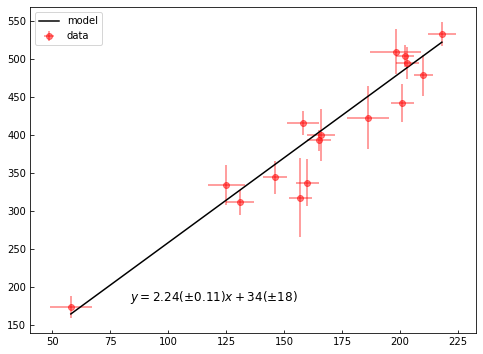

In [148]:
fit1.plot()

In [149]:
fit1.params

array([34.04772776,  2.23992083])

In [150]:
fit1.uncertainty

array([18.24616675,  0.10778048])

In [151]:
fit1.variance

array([3.32922601e+02, 1.16166311e-02])

In [152]:
fit1.chisqrd

matrix([[18.68076991]])

In [153]:
fit1.variance[1]

0.011616631123297434

#### standard uncertainty variance on the slope of the line is: $\sigma_m^2 = 0.0116$

# This is an example of the standard weighted least-square fit.

# Exercise 2: 
Repeat Exercise 1 but for all the data points in Table 1 on
page 6. Your plot should end up looking like Figure 2. What is the standard uncertainty variance $\sigma_m^2$ on the slope of the line? Is there anything you don't
like about the result? Is there anything different about the new points you have included beyond those used in Exercise 1?

In [154]:
fit2 = Least_Squares(data)
fit2.matrices();
result2 = fit2.fit()

<Figure size 432x288 with 0 Axes>

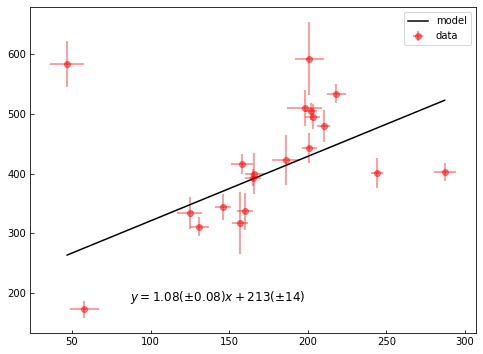

In [155]:
fit2.plot()

<Figure size 432x288 with 0 Axes>

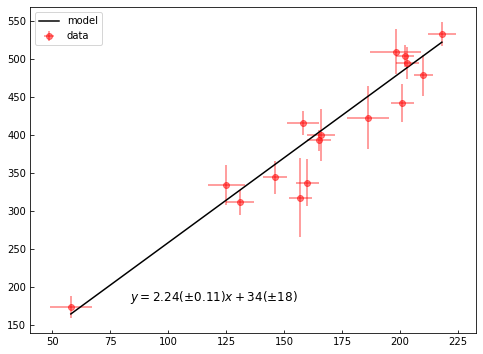

In [156]:
fit1.plot()

# Exercise 3: Quadratic Model

In [157]:
fit3 = Least_Squares(data)
fit3.matrices(cuts = {'ID':[5,20]}, model='quadratic');
result3 = fit3.fit()

<Figure size 432x288 with 0 Axes>

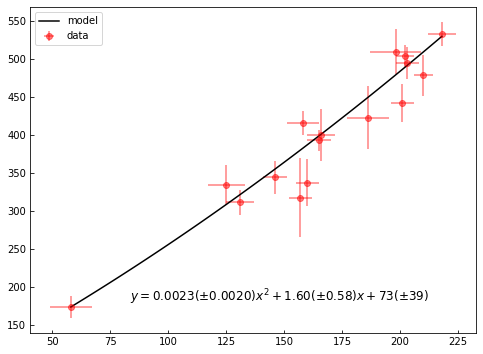

In [158]:
fit3.plot(model='quadratic')

# Exercise 4

In [190]:
import sympy

from sympy import symbols
from sympy import diff, Derivative
from sympy import init_printing

from sympy import diff, exp, sqrt, pi, ln, log

In [191]:
init_printing(use_unicode=True)

In [192]:
sigma, x, mu = symbols('sigma x mu')

In [193]:
eqn = (1/sqrt(2*pi*sigma**2))*exp(-0.5*((x-mu)/sigma)**2)

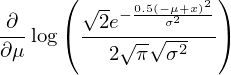

In [194]:
Derivative(ln(eqn), mu)

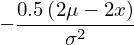

In [195]:
Derivative(ln(eqn), mu).doit()

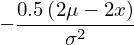

In [196]:
diff(ln(eqn), mu)

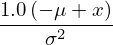

In [202]:
diff(ln(eqn), mu).simplify()

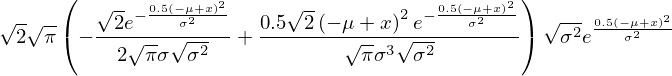

In [197]:
Derivative(ln(eqn), sigma).doit()

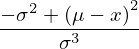

In [201]:
Derivative(ln(eqn), sigma).doit().simplify()

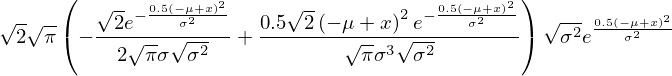

In [198]:
diff(ln(eqn), sigma)

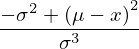

In [200]:
diff(ln(eqn), sigma).simplify()

In [203]:
sigma, x, y, m, b = symbols('sigma x y m b')
eqn = (1/sqrt(2*pi*sigma**2))*exp(-0.5*((y-m*x-b)/sigma)**2)

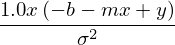

In [205]:
diff(ln(eqn), m)

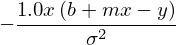

In [204]:
diff(ln(eqn), m).simplify()

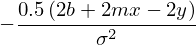

In [206]:
diff(ln(eqn), b)

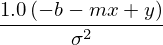

In [207]:
diff(ln(eqn), b).simplify()